# Аналитика в крупном интернет-магазине (анализ результатов A/B-теста) <a name="content"></a>

# Оглавление

* [Описание проекта](#project_description)
* [Описание данных](#data_description)
* [Часть 1. Приоритизация гипотез](#step_1)
    * [1.1. Изучение входных данных](#step_1_1)
    * [1.2. Приоритизация гипотез](#step_1_2)
    * [1.3. Вывод](#step_1_end)
* [Часть 2. Анализ A/B-теста](#step_2)
    * [Изучение входных данных](#step_2_00)
    * [Расчёт куммулятивных метрик](#step_2_01)
    * [2.1. График кумулятивной выручки по группам](#step_2_1)
    * [2.2. График кумулятивного среднего чека по группам](#step_2_2)
    * [2.3. График относительного изменения кумулятивного среднего чека группы B к группе A](#step_2_3)
    * [2.4. График кумулятивной конверсии по группам](#step_2_4)
    * [2.5. График относительного изменения кумулятивной конверсии группы B к группе A](#step_2_5)
    * [2.6. Точечный график количества заказов по пользователям](#step_2_6)
    * [2.7. Расчёт 95-го и 99-го перцентиля количества заказов на пользователя](#step_2_7)
    * [2.8. Точечный график стоимостей заказов](#step_2_8)
    * [2.9. Расчёт 95-го и 99-го перцентиля стоимости заказов](#step_2_9)
    * [2.10. Расчёт статистической значимости различий в конверсии между группами по «сырым» данным](#step_2_10)
    * [2.11. Расчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным](#step_2_11)
    * [2.12. Расчёт статистической значимости различий в конверсии между группами по «очищенным» данным](#step_2_12)
    * [2.13. Расчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным](#step_2_13)
    * [2.14. Решение по итогам анализа результатов A/B-теста](#step_2_14)

# Описание проекта <a name="project_description"></a>

Отделом маркетинга подготовили список гипотез для увеличения выручки.

Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

# Задачи исследовательского анализа <a name="analysis_tasks"></a>

* **Часть 1.** Приоритизация гипотез.


* **Часть 2.** Анализ результатов A/B-теста.

[**Вернуться к оглавлению...**](#content)

# Описание данных <a name="data_description"></a>

### Данные для первой части.

Таблица `hypothesis`:

* **Hypothesis** — краткое описание гипотезы;


* **Reach** — охват пользователей по 10-балльной шкале;


* **Impact** — влияние на пользователей по 10-балльной шкале;


* **Confidence** — уверенность в гипотезе по 10-балльной шкале;


* **Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение **Efforts**, тем дороже проверка гипотезы.


### Данные для второй части.

Таблица `orders`:

* **transactionId** — идентификатор заказа;


* **visitorId** — идентификатор пользователя, совершившего заказ;


* **date** — дата, когда был совершён заказ;


* **revenue** — выручка заказа;


* **group** — группа A/B-теста, в которую попал заказ.

Таблица `visitors`:

* **date** — дата;


* **group** — группа A/B-теста;


* **visitors** — количество пользователей в указанную дату в указанной группе A/B-теста.

[**Вернуться к оглавлению...**](#content)

# Часть 1. Приоритизация гипотез <a name="step_1"></a>

## 1.1. Изучение вдходных данных <a name="step_1_1"></a>

Импорт библиотек, необходимых для решения поставленной задачи.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from scipy import stats as st
import matplotlib.pyplot as plt

Чтение файла с входными данными.

In [2]:
hypothesis = pd.read_csv('../project_datasets/hypothesis.csv')

Вывод датафрейма `hypothesis` на экран.

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Получение общей информации о датафрейме `hypothesis`.

In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


**Вывод:** Данные корректны. Можно приступать к исследованию.

[**Вернуться к оглавлению...**](#content)

## 1.2. Приоритизация гипотез <a name="step_1_2"></a>

Выведем на экран текст с описанием для каждой гипотезы.

In [5]:
i = 0
for h in hypothesis['Hypothesis']:
    print(str(i) + '.', h, '\n')
    i += 1

0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей 

1. Запустить собственную службу доставки, что сократит срок доставки заказов 

2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа 

3. Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар 

4. Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей 

5. Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов 

6. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию 

7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок 

8. Запустить акцию, дающую скидку на товар в день рождения 



Итак, в нашем распоряжении 9 гипотез. Мы ознакомились с их описанием. Далее рассчитаем `ICE` и `RICE` для каждой из них.

In [6]:
hypothesis['ICE'] = (hypothesis['Impact'] * 
                     hypothesis['Confidence']) / hypothesis['Efforts']

hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] *
                      hypothesis['Confidence']) / hypothesis['Efforts']

Выведем на экран гипотезы с отсортированным, в порядке убывания, параметром `ICE`.

In [7]:
hypothesis[['Hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


Мы видим, что на данном этапе исследования самой перспективной гипотезой является гипотеза под номером 8. Затем идут гипотезы 0, 7 и 6.

Выведем на экран гипотезы с отсортированным, в порядке убывания, параметром `RICE`.

In [8]:
hypothesis[['Hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False)

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


Расчёт параметра `RICE` показал отличный от `ICE` результат. С учётом охвата пользователей самой перспективной гипотезой является гипотеза под номером 7. Далее идут гипотезы 2, 0 и 6.

In [9]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2


**Вывод:** После расчёта `RICE` наиболее приоритетной гипотезей стала гипотеза под номером 7, так как в отличии от гипотезы под номером 8 она имеет значительно большую оценку по параметру `Reach` (10 против 1) при более низкой оценке параметра `Efforts` (8 против 9).

[**Вернуться к оглавлению...**](#content)

## 1.3. Вывод <a name="step_1_end"></a>

1. Данные датафрейма `hypothesis` были проверены на корректность. Результат проверки показал, что данные полностью корректны.


2. Далее был произведён расчёт параметров `ICE` и `RICE` для каждой из гипотез. При расчёте параметра `ICE` наиболее перспективной гипотезой стала гипотеза под номером 8. После расчёта параметра `RICE` более приоритетной стала гипотеза под номером 7. Связано это с тем, что гипотеза под номером 7, в отличии от гипотезы под номером 8, имеет значительно большую оценку по параметру `Reach` (10 против 1) при более низкой оценке параметра `Efforts` (8 против 9).

[**Вернуться к оглавлению...**](#content)

# Часть 2. Часть 2. Анализ A/B-теста <a name="step_2"></a>

### Изучение вдходных данных <a name="step_2_00"></a>

Чтение файлов с входными данными.

In [10]:
orders = pd.read_csv('../project_datasets/orders.csv')
visitors = pd.read_csv('../project_datasets/visitors.csv')

Вывод нескольких строк датафрейма `orders` на экран.

Получение общей информации о датафрейме `orders`.

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Вывод нескольких строк датафрейма `visitors` на экран.

In [12]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Получение общей информации о датафрейме `visitors`.

In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Для удобства переименуем некоторые параметры.

In [14]:
orders = orders.rename(
    columns = {'transactionId': 'order_id', 'visitorId': 'visitor_id'})

Приведём параметр `date` в датафреймах `orders` и `visitors` к типу данных `datetime64`.

In [15]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x , '%Y-%m-%d'))

**Вывод:** Данные корректны. Можно приступать к исследованию.

[**Вернуться к оглавлению...**](#content)

### Расчёт куммулятивных метрик <a name="step_2_01"></a>

Создадим датафрейм `orders_daily_A`, в котором для каждой выбранной даты рассчитаем количество транзакций и суммарную выручку для группы A.

In [16]:
orders_daily_A = (orders[orders['group'] == 'A']
                  [['date', 'order_id', 'revenue']]
                  .groupby('date', as_index = False)
                  .agg({'order_id': 'nunique', 'revenue': 'sum'}))
orders_daily_A.columns = ['date', 'orders_per_date_A', 'revenue_per_date_A']

Создадим датафрейм `orders_cummulative_A`, в котором рассчитаем количество транзакций и суммарную выручку до выбранной даты включительно для группы A.

In [17]:
orders_cummulative_A = orders_daily_A.apply(
    lambda x: orders_daily_A[orders_daily_A['date'] <= x['date']]
    .agg({'date': 'max', 'orders_per_date_A': 'sum','revenue_per_date_A': 'sum'}), axis = 1)
orders_cummulative_A.columns = ['date', 'orders_cummulative_A', 'revenue_cummulative_A']

Создадим датафрейм `orders_daily_B`, в котором для каждой выбранной даты рассчитаем количество транзакций и суммарную выручку для группы B.

In [18]:
orders_daily_B = (orders[orders['group'] == 'B']
                  [['date', 'order_id', 'revenue']]
                  .groupby('date', as_index = False)
                  .agg({'order_id': 'nunique', 'revenue': 'sum'}))
orders_daily_B.columns = ['date', 'orders_per_date_B', 'revenue_per_date_B']

Создадим датафрейм `orders_cummulative_B`, в котором рассчитаем количество транзакций и суммарную выручку до выбранной даты включительно для группы B.

In [19]:
orders_cummulative_B = orders_daily_B.apply(
    lambda x: orders_daily_B[orders_daily_B['date'] <= x['date']]
    .agg({'date': 'max', 'orders_per_date_B': 'sum','revenue_per_date_B': 'sum'}), axis = 1)
orders_cummulative_B.columns = ['date', 'orders_cummulative_B', 'revenue_cummulative_B']

Создадим датафрейм `visitors_daily_A`, в котором рассчитаем суммарное количество посетителей для выбранной даты в группе A.

In [20]:
visitors_daily_A = (
    visitors[visitors['group'] == 'A']
    [['date', 'visitors']].groupby('date')['visitors'].sum().reset_index())
visitors_daily_A.columns = ['date', 'visitors_per_date_A']

Создадим датафрейм `visitors_cummulative_A`, в котором рассчитаем суммарное количество посетителей до выбранной даты в группе A.

In [21]:
visitors_cummulative_A = visitors_daily_A.apply(
    lambda x: visitors_daily_A[visitors_daily_A['date'] <= x['date']]
    .agg({'date': 'max', 'visitors_per_date_A': 'sum'}), axis = 1)
visitors_cummulative_A.columns = ['date', 'visitors_cummulative_A']

Создадим датафрейм `visitors_daily_B`, в котором рассчитаем суммарное количество посетителей для выбранной даты в группе B.

In [22]:
visitors_daily_B = (
    visitors[visitors['group'] == 'B']
    [['date', 'visitors']].groupby('date')['visitors'].sum().reset_index())
visitors_daily_B.columns = ['date', 'visitors_per_date_B']

Создадим датафрейм `visitors_cummulative_B`, в котором рассчитаем суммарное количество посетителей до выбранной даты в группе B.

In [23]:
visitors_cummulative_B = visitors_daily_B.apply(
    lambda x: visitors_daily_B[visitors_daily_B['date'] <= x['date']]
    .agg({'date': 'max', 'visitors_per_date_B': 'sum'}), axis = 1)
visitors_cummulative_B.columns = ['date', 'visitors_cummulative_B']

Создадим единый датафрейм `df`, который будет включать в себя датафреймы:

* `orders_daily_A`


* `orders_daily_B`


* `orders_cummulative_A`


* `orders_cummulative_B`


* `visitors_daily_A`


* `visitors_daily_B`


* `visitors_cummulative_A`


* `visitors_cummulative_B`

In [24]:
df = (orders_daily_A
      .merge(orders_daily_B, how = 'left', on = 'date')
      .merge(orders_cummulative_A, how = 'left', on = 'date')
      .merge(orders_cummulative_B, how = 'left', on = 'date')
      .merge(visitors_daily_A, how = 'left', on = 'date')
      .merge(visitors_daily_B, how = 'left', on = 'date')
      .merge(visitors_cummulative_A, how = 'left', on = 'date')
      .merge(visitors_cummulative_B, how = 'left', on = 'date'))

Выведем на экран несколько строк датафрейма `df` и приведём описание данных полученного датафрейма.

In [25]:
df.head()

,date,orders_per_date_A,revenue_per_date_A,orders_per_date_B,revenue_per_date_B,orders_cummulative_A,revenue_cummulative_A,orders_cummulative_B,revenue_cummulative_B,visitors_per_date_A,visitors_per_date_B,visitors_cummulative_A,visitors_cummulative_B
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


**Описание данных:**

Таблица `df`:

* `date` - дата;


* `orders_per_date_A` - количество заказов в выбранную дату в группе А;


* `revenue_per_date_A` - суммарная выручка в выбранную дату в группе А;


* `orders_per_date_B` - количество заказов в выбранную дату в группе B;


* `revenue_per_date_B` - суммарная выручка в выбранную дату в группе B;


* `orders_cummulative_A` - суммарное число заказов до выбранной даты включительно в группе A;


* `revenue_cummulative_A` - суммарная выручка до выбранной даты включительно в группе А;


* `orders_cummulative_B` - суммарное число заказов до выбранной даты включительно в группе B;


* `revenue_cummulative_B` - суммарная выручка до выбранной даты включительно в группе B;


* `visitors_per_date_A` - суммарное число посетителей в выбранную дату в группе A;


* `visitors_per_date_B` - суммарное число посетителей в выбранную дату в группе B;


* `visitors_cummulative_A` - суммарное число посетителей до выбранной даты включительно в группе A;


* `visitors_cummulative_B` - суммарное число посетителей до выбранной даты включительно в группе B.

[**Вернуться к оглавлению...**](#content)

### 2.1. График кумулятивной выручки по группам <a name="step_2_1"></a>

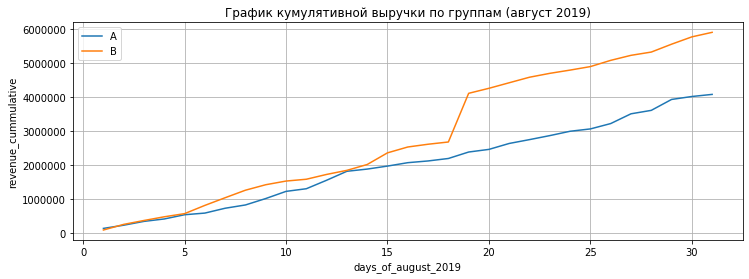

In [26]:
plt.figure(figsize = (12, 4))
plt.plot(df['date'].dt.day, df['revenue_cummulative_A'], label = 'A')
plt.plot(df['date'].dt.day, df['revenue_cummulative_B'], label = 'B')
plt.title('График кумулятивной выручки по группам (август 2019)')
plt.xlabel('days_of_august_2019')
plt.ylabel('revenue_cummulative')
plt.legend()
plt.grid()
plt.show()

**Вывод:** Выручка почти равномерно увеличивается в течение всего теста. Хороший знак. 

Однако графики выручки обеих групп в нескольких точках резко растут. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

[**Вернуться к оглавлению...**](#content)

### 2.2. График кумулятивного среднего чека по группам <a name="step_2_2"></a>

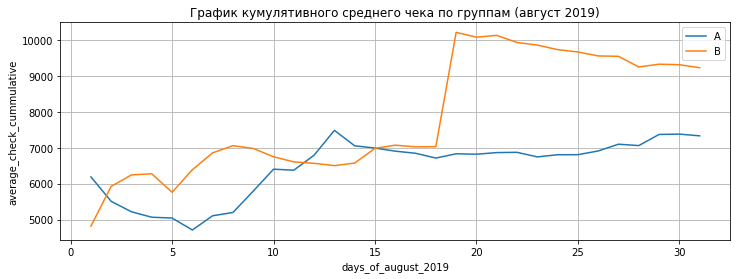

In [27]:
plt.figure(figsize = (12, 4))
plt.plot(df['date'].dt.day,
         df['revenue_cummulative_A'] / df['orders_cummulative_A'], label = 'A')
plt.plot(df['date'].dt.day,
         df['revenue_cummulative_B'] / df['orders_cummulative_B'], label = 'B')
plt.title('График кумулятивного среднего чека по группам (август 2019)')
plt.xlabel('days_of_august_2019')
plt.ylabel('average_check_cummulative')
plt.legend()
plt.grid()
plt.show()

**Вывод:** Средний чек группы A становиться равномерным к концу теста. Средний чек группы B во время второй половины теста совершает резкий скачок. Возможно, во второй половине теста в группу B попали очень крупные заказы.

[**Вернуться к оглавлению...**](#content)

### 2.3. График относительного изменения кумулятивного среднего чека группы B к группе A <a name="step_2_3"></a>

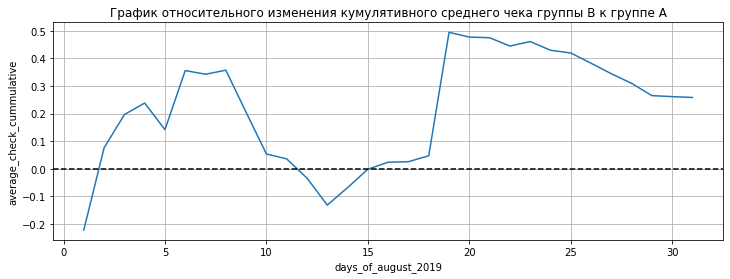

In [28]:
plt.figure(figsize = (12, 4))
plt.plot(
    df['date'].dt.day,
    (df['revenue_cummulative_B'] / df['orders_cummulative_B']) /
    (df['revenue_cummulative_A'] / df['orders_cummulative_A']) - 1)
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('days_of_august_2019')
plt.ylabel('average_check_cummulative')
plt.grid()
plt.show()

**Вывод:** В нескольких точках график резко скачет между сегментами. Вероятнее всего, данные содержат крупные заказы и выбросы.

[**Вернуться к оглавлению...**](#content)

### 2.4. График кумулятивной конверсии по группам <a name="step_2_4"></a>

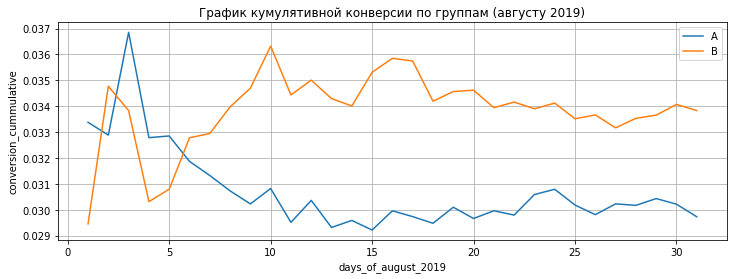

In [29]:
plt.figure(figsize = (12, 4))
plt.plot(
    df['date'].dt.day,
    df['orders_cummulative_A'] / df['visitors_cummulative_A'], label = 'A')
plt.plot(
    df['date'].dt.day,
    df['orders_cummulative_B'] / df['visitors_cummulative_B'], label = 'B')
plt.title('График кумулятивной конверсии по группам (августу 2019)')
plt.xlabel('days_of_august_2019')
plt.ylabel('conversion_cummulative')
plt.legend()
plt.grid()
plt.show()

**Вывод:** На графике изменения куммулятивной конверсии мы видим, что на второй неделе теста конверсия группы B значительно превосходит конверсию группы A.

[**Вернуться к оглавлению...**](#content)

### 2.5. График относительного изменения кумулятивной конверсии группы B к группе A <a name="step_2_5"></a>

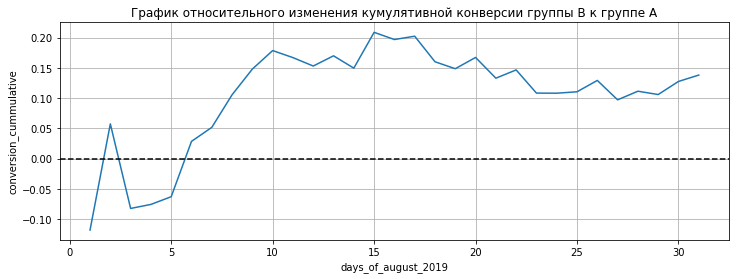

In [30]:
plt.figure(figsize = (12, 4))
plt.plot(
    df['date'].dt.day,
    (df['orders_cummulative_B'] / df['visitors_cummulative_B']) /
    (df['orders_cummulative_A'] / df['visitors_cummulative_A']) - 1)
plt.axhline(y = 0, color = 'black', linestyle = '--') 
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('days_of_august_2019')
plt.ylabel('conversion_cummulative')
plt.grid()
plt.show()

**Вывод:** График относительного изменения куммулятивной конверсии подтверждает ранее полученные результаты. Конверсия группы B значительно вырывается вперёд на второй неделе теста.

[**Вернуться к оглавлению...**](#content)

### 2.6. Точечный график количества заказов по пользователям <a name="step_2_6"></a>

Создадим датафрейм `orders_by_users`, в котором посчитаем количество заказов для каждого пользователя.

In [31]:
orders_by_users = (orders
                   .groupby(['visitor_id', 'group'], as_index = False)
                   .agg({'order_id': 'nunique'}))
orders_by_users.columns = ['visitor_id', 'group', 'orders']

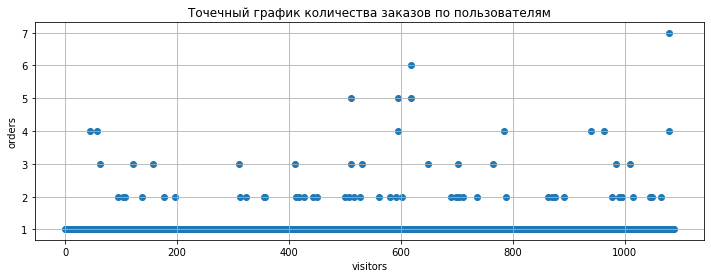

In [32]:
plt.figure(figsize = (12, 4))
plt.scatter(pd.Series(
    range(0, len(orders_by_users['orders']))), orders_by_users['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('visitors')
plt.ylabel('orders')
plt.grid()
plt.show()

**Вывод:** Большинство пользователей совершили всего один заказ, но пользователей совершивших 2-4 заказа тоже много. Рассчитаем их долю.

[**Вернуться к оглавлению...**](#content)

### 2.7. Расчёт 95-го и 99-го перцентиля количества заказов на пользователя <a name="step_2_7"></a>

In [33]:
print('Не более 5% пользователей совершали более: {} заказов.'
      .format(int(np.percentile(orders_by_users['orders'], 95))))
print('Не более 1% пользователей совершали более: {} заказов.'
      .format(int(np.percentile(orders_by_users['orders'], 99))))

Не более 5% пользователей совершали более: 2 заказов.
Не более 1% пользователей совершали более: 4 заказов.


**Вывод:** Итак, результаты расчёта показали, не более 5% пользователей совершили более 2 заказов. Принимем количество заказов больше 2 на одного пользователя за аномальные значения и отсеим их по найденной границе.

[**Вернуться к оглавлению...**](#content)

### 2.8. Точечный график стоимостей заказов <a name="step_2_8"></a>

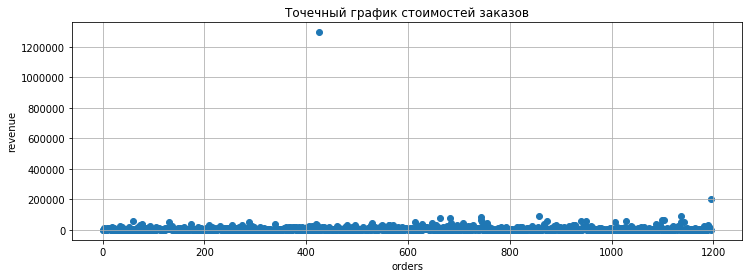

In [34]:
plt.figure(figsize = (12, 4))
plt.scatter(pd.Series(range(0, len(orders['revenue']))), orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('orders')
plt.ylabel('revenue')
plt.grid()
plt.show()

**Вывод:** Мы видим, что на графике присутствует некоторое количество очень дорогих заказов. Рассчитаем процентили, чтобы определить, какие значения являются выбросами.

[**Вернуться к оглавлению...**](#content)

### 2.9. Расчёт 95-го и 99-го перцентиля стоимости заказов <a name="step_2_9"></a>

In [35]:
print('Не более 5% заказов дороже: {} рублей.'
      .format(int(np.percentile(orders['revenue'], 95))))
print('Не более 1% заказов дороже: {} рублей.'
      .format(int(np.percentile(orders['revenue'], 99))))

Не более 5% заказов дороже: 28000 рублей.
Не более 1% заказов дороже: 58233 рублей.


**Вывод:** Итак, результаты расчёта показали, что не более 5% пользователей совершали заказ на сумму свыше 28000 рублей, следовательно. Примем заказы на сумму свыше 28000 рублей за аномальные значения и отсеим их по найденной границе.

[**Вернуться к оглавлению...**](#content)

### 2.10. Расчёт статистической значимости различий в конверсии между группами по «сырым» данным <a name="step_2_10"></a>

Создадим датафреймы `orders_by_users_A` и `orders_by_users_B`. В них для пользователей, которые совершили хотя бы 1 заказ посчитаем количество заказов.

In [36]:
orders_by_users_A = (
    orders_by_users[orders_by_users['group'] == 'A']
    [['visitor_id', 'orders']].copy())

In [37]:
orders_by_users_B = (
    orders_by_users[orders_by_users['group'] == 'B']
    [['visitor_id', 'orders']].copy())

Объявим переменные `sample_A` и `sample_B`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

Переменные `sample_A` и `sample_B` должнs состоять из двух частей:

* Список с количеством заказов для каждого из пользователей: `orders_by_usersA['orders']`.


* Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах (пример расчёта для группы А): `df['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])`.

In [38]:
sample_A = pd.concat(
    [orders_by_users_A['orders'], 
     pd.Series(0, name = 'orders', 
               index = np.arange(
                   df['visitors_per_date_A'].sum() - 
                   len(orders_by_users_A['orders'])))
    ], axis = 0)

In [39]:
sample_B = pd.concat(
    [orders_by_users_B['orders'], 
     pd.Series(0, name = 'orders', 
               index = np.arange(
                   df['visitors_per_date_B'].sum() - 
                   len(orders_by_users_B['orders'])))
    ], axis = 0)

Проверим, существует ли статистически значимое различие между конверсиями в группах A и B.

<b>Формулировка нулевой гипотезы H<sub>0</sub>:</b> Конверсия  в группе A и конверсия в группе B **равны**.


<b>Формулировка альтернативной гипотезы H<sub>1</sub>:</b> Конверсия  в группе A и конверсия в группе B **не равны**.

In [40]:
alpha = 0.05

results = st.mannwhitneyu(sample_A, sample_B)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу!')
else:
    print('Не получилось отвергнуть нулевую гипотезу!')

p-значение: 0.008396177528376304
Отвергаем нулевую гипотезу!


**Вывод:** В результате статистического расчёта "сырых" данных, значение p-value получилось меньше принятного уровня статистической значимости, следовательно, можно сделать вывод о том, что между конверсиями группы A и группы B существует статистически значимое различие.

Расчёт относительного показателя конверсии.

In [41]:
print("{0:.2%}".format(sample_B.mean() / sample_A.mean() - 1)) 

13.81%


**Вывод:** Результат расчёта говорит нам о том, что выигрыш группы B равен 13.81%.

[**Вернуться к оглавлению...**](#content)

### 2.11. Расчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным <a name="step_2_11"></a>

<b>Формулировка нулевой гипотезы H<sub>0</sub>:</b> Средний чек в группе A и средний чек в группе B **равны**.


<b>Формулировка альтернативной гипотезы H<sub>1</sub>:</b> Средний чек в группе A и средний чек в группе B **не равны**.

In [42]:
alpha = 0.05

results = st.mannwhitneyu(
    orders[orders['group'] == 'A']['revenue'],
    orders[orders['group'] == 'B']['revenue'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу!')
else:
    print('Не получилось отвергнуть нулевую гипотезу!')

p-значение: 0.3646454927716229
Не получилось отвергнуть нулевую гипотезу!


**Вывод:** Результат статистического расчёта показал, что в "сырых данных" нет статистически значимых различий между средним чеком группы A и группы B.

In [43]:
print('{:.2%}'.format(
    orders[orders['group'] == 'B']['revenue'].mean() / 
    orders[orders['group'] == 'A']['revenue'].mean() - 1))

25.87%


**Вывод:** Однако, расчёт относительного показателя сообщает нам о том, что средний чек группы B в выигрыше на 25.87% относительно среднего чека группы A.

[**Вернуться к оглавлению...**](#content)

### 2.12. Расчёт статистической значимости различий в конверсии между группами по «очищенным» данным <a name="step_2_12"></a>

Очистим данные от выбросов. Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 28000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и 5% пользователей с дорогими заказами.

Сделаем срезы пользователей с числом заказов больше 2 — `users_with_many_orders` и пользователей, совершивших заказы дороже 28000 — `users_with_expensive_orders`. Объединим их в таблице `abnormal_users`.

In [44]:
users_with_many_orders = (
    orders_by_users[orders_by_users['orders'] > 2]['visitor_id'])

users_with_expensive_orders = (
    orders[orders['revenue'] > 28000]['visitor_id'])

abnormal_users = pd.concat(
    [users_with_many_orders,
     users_with_expensive_orders], axis = 0).drop_duplicates().sort_values()

In [45]:
print('Количество аномальных пользователей: {}'.format(len(abnormal_users)))

Количество аномальных пользователей: 74


Всего 74 аномальных пользователей.

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [46]:
sample_A_filtered = pd.concat([
    orders_by_users_A[np.logical_not(
        orders_by_users_A['visitor_id'].isin(abnormal_users))]['orders'],
    pd.Series(0, name = 'orders',
              index = np.arange(df['visitors_per_date_A'].sum() - 
                                len(orders_by_users_A['orders'])))], axis = 0)

In [47]:
sample_B_filtered = pd.concat([
    orders_by_users_B[np.logical_not(
        orders_by_users_B['visitor_id'].isin(abnormal_users))]['orders'],
    pd.Series(0, name = 'orders',
              index = np.arange(df['visitors_per_date_B'].sum() - 
                                len(orders_by_users_B['orders'])))], axis = 0)

<b>Формулировка нулевой гипотезы H<sub>0</sub>:</b> Конверсия  в группе A и конверсия в группе B **равны**.


<b>Формулировка альтернативной гипотезы H<sub>1</sub>:</b> Конверсия  в группе A и конверсия в группе B **не равны**.

In [48]:
alpha = 0.05

results = st.mannwhitneyu(sample_A_filtered, sample_B_filtered)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу!')
else:
    print('Не получилось отвергнуть нулевую гипотезу!')

p-значение: 0.006521296371518379
Отвергаем нулевую гипотезу!


**Вывод:** Результат расчёта статистической значимости различий в конверсии между группами по «очищенным» данным показал, что конверсии групп A и B после очистки данных по-прежнему имеют статистически значимые различия.

In [49]:
print("{0:.2%}".format(sample_B_filtered.mean() / sample_A_filtered.mean() - 1))

17.27%


**Вывод:** Результат расчёта относительного показателя после очистки данных от выбросов сообщает, что конверсия группы B превосходит конверсию группы A на 17.27%. Этот показатель возрос на 3.46% относительно расчётов на "сырых" данных.

[**Вернуться к оглавлению...**](#content)

### 2.13. Расчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным <a name="step_2_13"></a>

Создадим датафреймы `revenue_filtered_A` и `revenue_filtered_B`, в которых сохраним данные о выручках с заказов, очищенные от крупных заказов и выбросов.

In [50]:
revenue_filtered_A = orders[
    np.logical_and(orders['group'] == 'A',
                   np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue']

revenue_filtered_B = orders[
    np.logical_and(orders['group'] == 'B',
                   np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue']

Проведём расчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

In [51]:
alpha = 0.05

results = st.mannwhitneyu(revenue_filtered_A, revenue_filtered_B)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу!')
else:
    print('Не получилось отвергнуть нулевую гипотезу!')

p-значение: 0.3692408756572825
Не получилось отвергнуть нулевую гипотезу!


**Вывод:** Результат статистического расчёта очищенных данных показал, что средние чеки группы A и B по-прежнему не имеют статистически значимых различий.

In [52]:
print('{:.2%}'.format(revenue_filtered_B.mean() / revenue_filtered_A.mean() - 1))

-1.96%


**Вывод:** Однако, расчёт относительного показателя сообщает нам о том, что, в отличие, "сырых" данных средний чек группы B уступает среднему чеку группы A на 1.96%.

[**Вернуться к оглавлению...**](#content)

### 2.14. Решение по итогам анализа результатов A/B-теста <a name="step_2_14"></a>

* Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.


* Нет статистически значимого различия по среднему чеку между группа как по сырым данным, так и после фильтрации от аномалий.


* График различия конверсии между группами сообщает, что результаты группы B лучше группы A: показатели зафиксировались около среднего значения.

С учётом этих факторов, можно зафиксировать победу группы B.

[**Вернуться к оглавлению...**](#content)